<a href="https://colab.research.google.com/github/pedropintomoya/datasetMVP/blob/main/Notebook_MVP_qualidade_de_software.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP Qualidade de Software, Segurança e Sistemas Inteligentes
---
Pedro Pinto Moya



# Chamadas das bibliotecas a serem utilizadas durante o desenvolvimento


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

# cnao exibir warnings
import warnings
warnings.filterwarnings("ignore")

# Carregando o dataset e selecionando o conjunto de testes e de terinamento


Carregando o dataset

In [77]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/pedropintomoya/datasetMVP/main/college_student_management_data.csv"

# Lê o arquivo e mostra os resultados
dataset = pd.read_csv(url, delimiter=',')
dataset.drop(columns=['student_id','gender','major','enrollment_status','risk_level'], inplace=True)
dataset.head()

,age,GPA,course_load,avg_course_grade,attendance_rate,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate
0,24,2.42,5,67.2,0.71,32,33,0.70,8,0.74
1,21,3.73,6,64.4,0.84,29,53,0.91,13,0.85
2,22,2.80,3,95.3,0.89,34,69,0.58,18,0.99
3,24,2.59,4,73.7,0.98,22,18,0.91,6,0.72
4,20,2.30,4,87.4,0.95,9,11,0.77,15,0.76


Separando os dados que serão usados para terinamento e teste

In [78]:
#declarando tamanho do teste e semente
tam_teste = 0.2
semente = 7

#separando treino
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
X_treino, X_teste, Y_treino, Y_teste = skl.model_selection.train_test_split(X, Y, test_size=tam_teste, shuffle=True, random_state=semente, stratify=Y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = skl.model_selection.StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=semente) # validação cruzada com estratificação

# Modelagem


Base

KNN: 0.050157 (0.017690)
CART: 0.062313 (0.018544)
SVM: 0.055042 (0.013574)
NB: 0.065565 (0.030076)


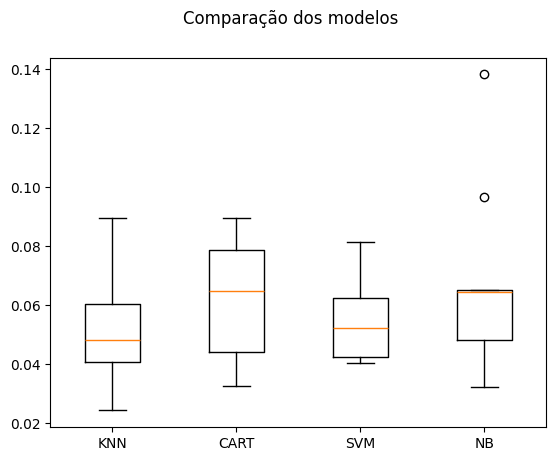

In [79]:
#iniciando variaveis necessarias
np.random.seed(7)
modelos = []
resultados = []
nomes = []

#salvando os modelos
modelos.append(('KNN', skl.neighbors.KNeighborsClassifier()))
modelos.append(('CART', skl.tree.DecisionTreeClassifier()))
modelos.append(('SVM', skl.svm.SVC()))
modelos.append(('NB', skl.naive_bayes.GaussianNB()))


#avaliacao
for nome, modelo in modelos:
  cv_results = skl.model_selection.cross_val_score(modelo, X_treino, Y_treino, cv=kfold, scoring=scoring)
  resultados.append(cv_results)
  nomes.append(nome)
  print('%s: %f (%f)' % (nome, cv_results.mean(), cv_results.std()))

#comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação dos modelos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()


Dados normalizados/padronizados

KNN-orig: 0.050157 (0.017690)
CART-orig: 0.062313 (0.018544)
NB-orig: 0.065565 (0.030076)
SVM-orig: 0.055042 (0.013574)
KNN-padr: 0.063919 (0.018275)
CART-padr: 0.059841 (0.013530)
NB-padr: 0.065565 (0.030076)
SVM-padr: 0.050190 (0.013033)
KNN-norm: 0.052557 (0.013524)
CART-norm: 0.060700 (0.018984)
NB-norm: 0.065565 (0.030076)
SVM-norm: 0.051777 (0.010335)


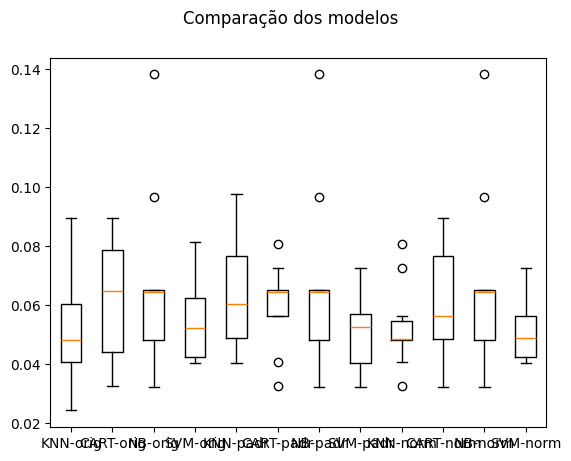

In [80]:
#inicializando as variaveis
#listas e semente
np.random.seed(7)
pipelines = []
resultados = []
nomes = []

#algoritmos
knn = ('KNN', skl.neighbors.KNeighborsClassifier())
cart = ('CART', skl.tree.DecisionTreeClassifier())
NB = ('NB', skl.naive_bayes.GaussianNB())
SVM = ('SVM', skl.svm.SVC())

#transformações
standard_scaler = ('standard_scaler', skl.preprocessing.StandardScaler())
min_max_scaler = ('min_max_scaler', skl.preprocessing.MinMaxScaler())

#pipelines

#original
pipelines.append(('KNN-orig', skl.pipeline.Pipeline([knn])))
pipelines.append(('CART-orig', skl.pipeline.Pipeline([cart])))
pipelines.append(('NB-orig', skl.pipeline.Pipeline([NB])))
pipelines.append(('SVM-orig', skl.pipeline.Pipeline([SVM])))

#padronizado
pipelines.append(('KNN-padr', skl.pipeline.Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', skl.pipeline.Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', skl.pipeline.Pipeline([standard_scaler, NB])))
pipelines.append(('SVM-padr', skl.pipeline.Pipeline([standard_scaler, SVM])))

#normalizado
pipelines.append(('KNN-norm', skl.pipeline.Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', skl.pipeline.Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', skl.pipeline.Pipeline([min_max_scaler, NB])))
pipelines.append(('SVM-norm', skl.pipeline.Pipeline([min_max_scaler, SVM])))

#executando as pipelines
for nome, pipeline in pipelines:
  cv_results = skl.model_selection.cross_val_score(pipeline, X_treino, Y_treino, cv=kfold, scoring=scoring)
  resultados.append(cv_results)
  nomes.append(nome)
  print('%s: %f (%f)' % (nome, cv_results.mean(), cv_results.std()))

#plotando os modelos
fig = plt.figure()
fig.suptitle('Comparação dos modelos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()


Hiperparametros

In [81]:
#declarando variaveis e semente
np.random.seed(7)
pipelines = []

knn = ('KNN', skl.neighbors.KNeighborsClassifier())
standard_scaler = ('StandardScaler', skl.preprocessing.StandardScaler())
min_max_scaler = ('MinMaxScaler', skl.preprocessing.MinMaxScaler())

pipelines.append(('KNN-orig', skl.pipeline.Pipeline(steps=[knn])))
pipelines.append(('KNN-padr', skl.pipeline.Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('KNN-norm', skl.pipeline.Pipeline(steps=[min_max_scaler, knn])))

param_grid ={'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
             'KNN__metric':["euclidean", "manhattan", "minkowski"]}


#gridSearchCV
for nome, modelo in pipelines:
  grid = skl.model_selection.GridSearchCV(estimator=modelo, param_grid=param_grid, scoring=scoring, cv=kfold)
  grid.fit(X_treino, Y_treino)
  print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (nome, grid.best_score_, grid.best_params_))


Sem tratamento de missings: KNN-orig - Melhor: 0.065572 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 13}
Sem tratamento de missings: KNN-padr - Melhor: 0.063919 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}
Sem tratamento de missings: KNN-norm - Melhor: 0.064673 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}


# Finalizando


In [82]:
#avaliação do modelo com o conjunto de testes

#preparação
scaler = skl.preprocessing.StandardScaler().fit(X_treino)
rescaledX = scaler.transform(X_treino)
modelo = skl.neighbors.KNeighborsClassifier(n_neighbors=1)
modelo.fit(rescaledX, Y_treino)

#acuracia aproximada do teste
rescaledX = scaler.transform(X_teste)
resultado = modelo.score(rescaledX, Y_teste)
print("Acurácia: %.3f%%" % (resultado*100.0))

Acurácia: 4.207%


In [83]:
#preparação do modelo
scaler = skl.preprocessing.StandardScaler().fit(X)
rescaledX = scaler.transform(X)
modelo.fit(rescaledX, Y)


KNeighborsClassifier(n_neighbors=1)

# Simulação da aplicação

In [84]:
#dados novos de teste
newData = {
    'age': [32,19,23],
    'GPA': [3.2,2.7,4.1],
    'load': [3,4,5],
    'grade': [76.0,43.0,81.3],
    'att': [0.9,0.32,0.83],
    'log': [30,29,32],
    'ses': [50,60,30],
    'sub': [0.80,0.38,0.57],
    'part': [15,13,5],
    'vid': [0.81,0.73,0.99],
}

atributos = ['age','GPA','load','grade','att','log','ses','sub','part','vid']
entrada = pd.DataFrame(newData, columns=atributos)

array = entrada.values
X_entrada = array[:,0:8].astype(float)

#padronização dos dados de entrada
rescaledX = scaler.transform(X_entrada)
print(rescaledX)
#predição
resultado = modelo.predict(rescaledX)
print(resultado)

[[ 4.57358553  0.32855952 -1.35486334 -0.33968962  0.91690993  0.9256156
   0.02738313  0.33124073]
 [-1.07971408 -0.5467758  -0.44395652 -3.20305665 -4.12198978  0.83874425
   0.45864656 -2.57928208]
 [ 0.65976272  1.90416309  0.46695029  0.12018447  0.30876686  1.09935829
  -0.83514372 -1.262617  ]]
[ 2. 10. 15.]
